In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../datasets/google_stocks/Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


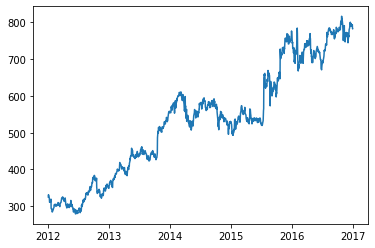

In [4]:
plt.plot(pd.to_datetime(df['Date']),df['Open'])

In [5]:
price = df[['Open']]

In [6]:
price

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(price)

In [9]:
price_scaled.shape

(1258, 1)

In [10]:
X = []
for i in range(1198):
    row = price_scaled[i:i+61,0]
    X.append(row)
X = np.array(X)
X.shape

(1198, 61)

In [11]:
X_train, y_train = X[:,:-1], X[:,-1]

In [12]:
X_train.shape, y_train.shape

((1198, 60), (1198,))

In [13]:
X_train = X_train.reshape(1198,60,1)

In [15]:
X_train.shape

(1198, 60, 1)

In [14]:
# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [16]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')

In [17]:
model.fit(X_train,y_train,epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 21s 165ms/step - loss: 0.0462
Epoch 2/50
38/38 [==============================] - 6s 159ms/step - loss: 0.0154
Epoch 3/50
38/38 [==============================] - 6s 160ms/step - loss: 0.0110
Epoch 4/50
38/38 [==============================] - 6s 147ms/step - loss: 0.0099
Epoch 5/50
38/38 [==============================] - 5s 142ms/step - loss: 0.0082
Epoch 6/50
38/38 [==============================] - 5s 143ms/step - loss: 0.0071
Epoch 7/50
38/38 [==============================] - 6s 147ms/step - loss: 0.0065
Epoch 8/50
38/38 [==============================] - 5s 142ms/step - loss: 0.0040
Epoch 9/50
38/38 [==============================] - 5s 144ms/step - loss: 0.0046
Epoch 10/50
38/38 [==============================] - 6s 147ms/step - loss: 0.0043
Epoch 11/50
38/38 [==============================] - 5s 142ms/step - loss: 0.0037
Epoch 12/50
38/38 [==============================] - 5s 143ms/step - loss: 0.0038
Epoch 13/50
38/38 [=====

# Model Evaluation

In [18]:
df_test = pd.read_csv('../../../datasets/google_stocks/Google_Stock_Price_Test.csv')

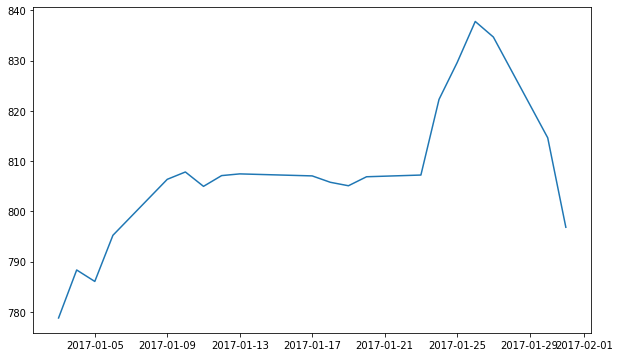

In [25]:
plt.figure(figsize=(10,6))
plt.plot(pd.to_datetime(df_test['Date']),df_test['Open'])

In [30]:
df[['Open']].iloc[-60:]

,Open
1198,779.00
1199,779.66
1200,777.71
1201,786.66
1202,783.76
1203,781.22
1204,781.65
1205,779.80
1206,787.85
1207,798.24


In [33]:
test_data = pd.concat([df[['Open']].iloc[-60:], df_test[['Open']]])

In [34]:
test_data

,Open
1198,779.00
1199,779.66
1200,777.71
1201,786.66
1202,783.76
...,...
15,829.62
16,837.81
17,834.71
18,814.66


In [35]:
test_scaled = scaler.transform(test_data)

In [37]:
test_scaled.shape

(80, 1)

In [38]:
X = []
for i in range(20):
    row = test_scaled[i:i+60,0]
    X.append(row)
X = np.array(X)
X.shape

(20, 60)

In [39]:
X_test = X.reshape(20,60,1)
yp = model.predict(X_test)

1/1 [==============================] - 5s 5s/step


In [42]:
yp = scaler.inverse_transform(yp)

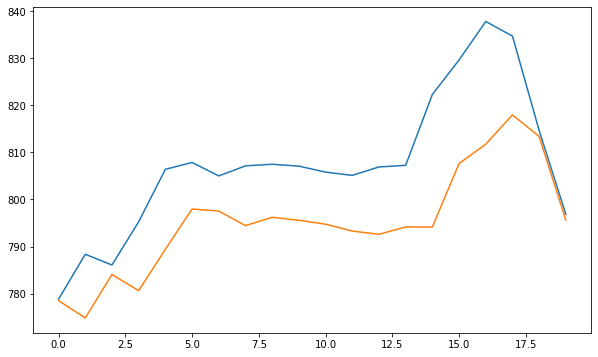

In [43]:
plt.figure(figsize=(10,6))
plt.plot(df_test['Open'])
plt.plot(yp)